In [51]:
!pip install textblob
!pip install wordcloud

In [52]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [53]:
data= pd.read_csv('twitter_training.csv')

In [54]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [55]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('twitter_training.csv', names=col_names)

In [56]:
df['Contest'] = df['Contest'].str.replace("[^a-zA-Z#]"," ")
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [57]:
df.shape

(74682, 4)

In [58]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [59]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [60]:
df.dropna(axis=0,inplace=True)

In [61]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [62]:
df.duplicated().sum()

2340

In [63]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [64]:
df.shape

(71656, 4)

In [65]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

Text(0, 0.5, 'Count')

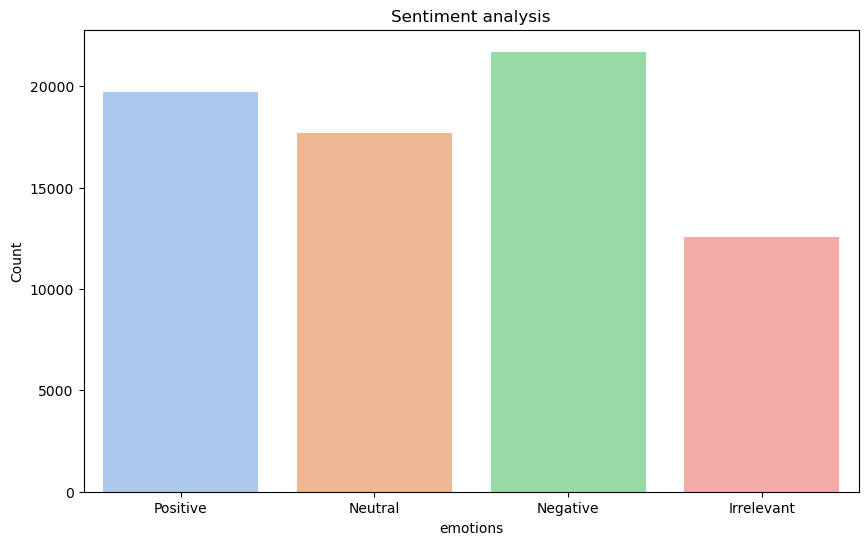

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiments', data=df, palette= 'pastel', legend=False, hue='Sentiments')
plt.title('Sentiment analysis')
plt.xlabel('emotions')
plt.ylabel('Count')

In [67]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

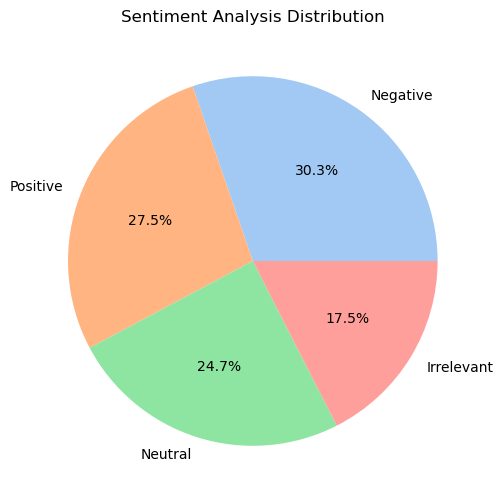

In [68]:
emotion_counts = df['Sentiments'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Analysis Distribution')
plt.show()

In [69]:
df['Contest'] = df['Contest'].astype(str)

In [70]:
df['Contest'] = df['Contest'].fillna('')
tokenized_tweets = df['Contest'].apply(lambda x: x.split())

In [71]:
tokenized_tweets.head() 

0    [im, getting, on, borderlands, and, i, will, m...
1    [I, am, coming, to, the, borders, and, I, will...
2    [im, getting, on, borderlands, and, i, will, k...
3    [im, coming, on, borderlands, and, i, will, mu...
4    [im, getting, on, borderlands, 2, and, i, will...
Name: Contest, dtype: object

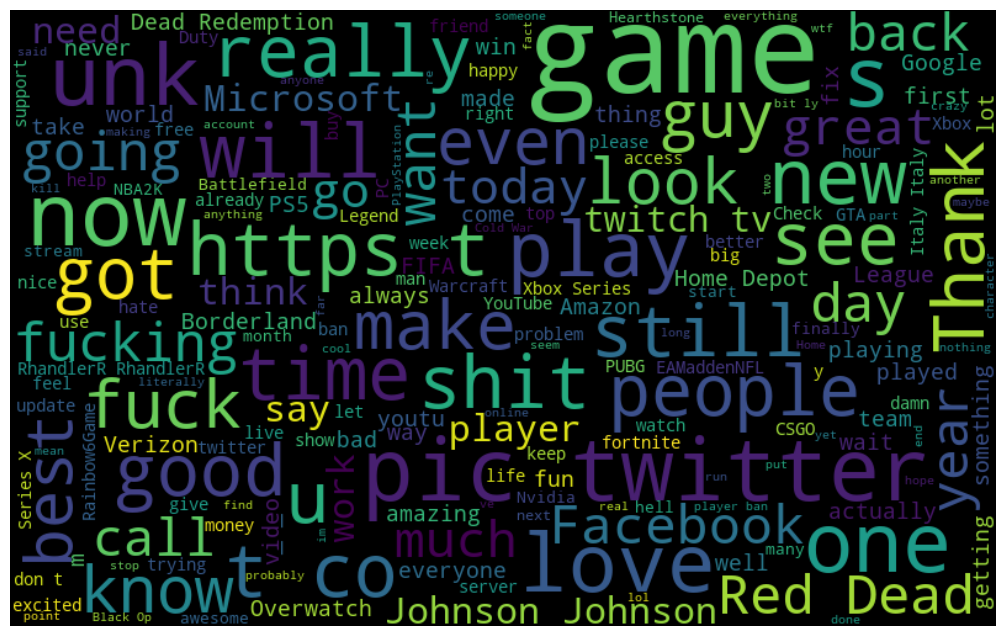

In [72]:
from wordcloud import WordCloud
all_words= " " .join([sentence for sentence in df['Contest']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()